### Student Information
Name: Truong Ngoc Khoi Nguyen

Student ID: D142113032

GitHub ID: nguyentr0101

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [8]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1028)>


In [18]:
DATA_PATH = "newdataset/Reddit-stock-sentiment.csv"
df= pd.read_csv(DATA_PATH)

print("\nFirst 5 records:")
print(df.head())

print("\nData types:")
print(df.dtypes)

text_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nText columns found: {text_columns}")

# Keep only what we need
X = pd.DataFrame()
X['text'] = df['title'] + ' ' + df['text']  # Combine title and text
X['category'] = df['label']  # Numerical label
X['category_name'] = df['label'].map({-1: 'negative', 0: 'neutral', 1: 'positive'})

print(f"Dataset shape: {X.shape}")
print(f"\nCategory distribution:")
print(X['category_name'].value_counts())



First 5 records:
      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinping...          Just-Big6411   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0   

In [20]:
# ==========================================
# Exercise 1
# ==========================================
# Print out the text data for the first three samples in the dataset
print("\nFirst 3 samples in the dataset:")
for i in range(3):
    print(f"example {i+1}")
    print(X['text'][i])
    print()

# Display sample texts
print("\nSample texts from each category:")
for category in X['category_name'].unique():
    if pd.notna(category):
        sample = X[X['category_name'] == category].iloc[0]['text']
        print(f"\n{category}:")
        print(sample[:200] + "..." if len(str(sample)) > 200 else sample)


First 3 samples in the dataset:
example 1
Retardation is on the menu boys! WSB is so back Calls on retards

example 2
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

example 3
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision? Seeing lots of red in the ticker.


Sample texts from each category:

negative:
Retardation is on the menu boys! WSB is so back Calls on retards

neutral:
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history Stunt as in like why did they even make a big deal about starting it in the first place? No company ...

positive:
Who knows more? $VMAR Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torr

In [24]:
# ==========================================
# Exercise 2
# ==========================================
X.loc[0:10, ["text", "category_name"]]

X[X["category_name"] == "positive"].head(5)

some_idx = [1, 81, 92, 100]
X.loc[some_idx, ["text", "category_name"]]

,text,category_name
1,Retail giant TARGET has now declined for 10 co...,neutral
81,Retardation is on the menu boys! WSB is so bac...,positive
92,Data Shows US Allies—Not China—Dumping Treasur...,neutral
100,The Trump administration is begging Xi Jinping...,negative


In [26]:
# ==========================================
# Exercise 3
# ==========================================
# Fetch records belonging to 'positive' sentiment, query every 10th record, show first 5
X[X["category_name"] == "positive"][::10][0:5]
# Fetch records belonging to 'negative' sentiment, query every 10th record, show first 5
X[X["category_name"] == "negative"][::10][0:5]

,text,category,category_name
0,Retardation is on the menu boys! WSB is so bac...,-1.0,negative
25,Retail giant TARGET has now declined for 10 co...,-1.0,negative
62,The Trump administration is begging Xi Jinping...,-1.0,negative
95,Data Shows US Allies—Not China—Dumping Treasur...,-1.0,negative
125,The Trump administration is begging Xi Jinping...,-1.0,negative


In [37]:
# ==========================================
# Exercise 4
# ==========================================
# Check for missing values
X.isnull().sum()

# Check missing values per column with the helper function
X.isnull().apply(lambda x: f"Missing: {x.sum()}")

# Add a dummy record with missing value to test
dummy_dict = [{'text': 'dummy stock comment',
               'category': 1}]
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
X.isnull().sum() # Check again - should show some missing in category_name
X.dropna(inplace=True) # Remove records with missing values
X.isnull().sum() # Verify no missing values remain

# Calculate missing values in every record instead of every column
X.isnull().apply(lambda x: x.sum(), axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
842    0
843    0
844    0
845    0
846    0
Length: 847, dtype: int64

In [38]:
# ==========================================
# Exercise 5
# ==========================================
NA_dict = [{ 'id': 'A', 'sentiment': np.nan },
           { 'id': 'B' },
           { 'id': 'C', 'sentiment': 'NaN'  },
           { 'id': 'D', 'sentiment': 'None' },
           { 'id': 'E', 'sentiment':  None  },
           { 'id': 'F', 'sentiment': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','sentiment'])
NA_df

# Check which ones are detected as null
NA_df['sentiment'].isnull()

# .isnull() detects actual null values, not string representations.
# A: np.nan → Real NaN value → .isnull() = True
# B: Missing key → Fill with NaN → .isnull() = True
# C: 'NaN' → "NaN" as text → .isnull() = False
# D: 'None' → "None" as text → .isnull() = False
# E: None → Python's None object → .isnull() = True
# F: '' → Empty string is a valid string) → .isnull() = False

0     True
1     True
2    False
3    False
4     True
5    False
Name: sentiment, dtype: bool

In [46]:
# ==========================================
# Exercise 6
# ==========================================
# Sampling
X_sample = X.sample(n=500, random_state=42)
print(f"Original size: {len(X)}")
print(f"Sample size: {len(X_sample)}")
# Check columns are same
print(f"Same columns: {X.columns.equals(X_sample.columns)}")
# Check index changes
print(f"Sample indices (first 5): {X_sample.index[:5].tolist()}")
# Compare distributions
print("\nOriginal distribution:")
print(X['category_name'].value_counts(normalize=True))
print("\nSample distribution:")
print(X_sample['category_name'].value_counts(normalize=True))

# X_sample has 500 lines, while X has 847 lines, but they have the same columns
# Data types and column names are unchanged, because X_sample is the subset of X
# X_sample is chosen randomly, no replacement.
# Row order is shuffled, but index label is preserved.
# Category distribution of X_sample may different from X due to sample variability


Original size: 847
Sample size: 500
Same columns: True
Sample indices (first 5): [457, 342, 280, 275, 843]

Original distribution:
category_name
neutral     0.499410
negative    0.371901
positive    0.128689
Name: proportion, dtype: float64

Sample distribution:
category_name
neutral     0.494
negative    0.368
positive    0.138
Name: proportion, dtype: float64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

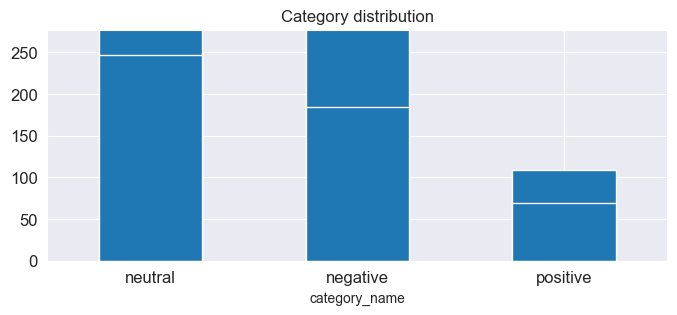

In [49]:
# ==========================================
# Exercise 7
# ==========================================
# Whole dataset
X['category_name'].value_counts().plot(
    kind='bar',
    title='Original Distribution',
    ylim=[0, X['category_name'].value_counts().max() + 50],
    rot=0, fontsize=12, figsize=(8,3)
)

# Sample
X_sample.category_name.value_counts().plot(
    kind='bar',
    title='Category distribution',
    ylim=[0, X_sample.category_name.value_counts().max() + 30],
    rot=0, fontsize=12, figsize=(8, 3)
)

Sample unigrams from first 3 posts:
Post 1 (first 10 tokens): ['Retardation', 'is', 'on', 'the', 'menu', 'boys', '!', 'WSB', 'is', 'so']
Post 2 (first 10 tokens): ['Retail', 'giant', 'TARGET', 'has', 'now', 'declined', 'for', '10', 'consecutive', 'weeks']
Post 3 (first 10 tokens): ['How', 'do', 'you', 'feel', 'about', 'a', 'sitting', 'president', 'making', '$']


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1028)>


(0.0, 453.0)

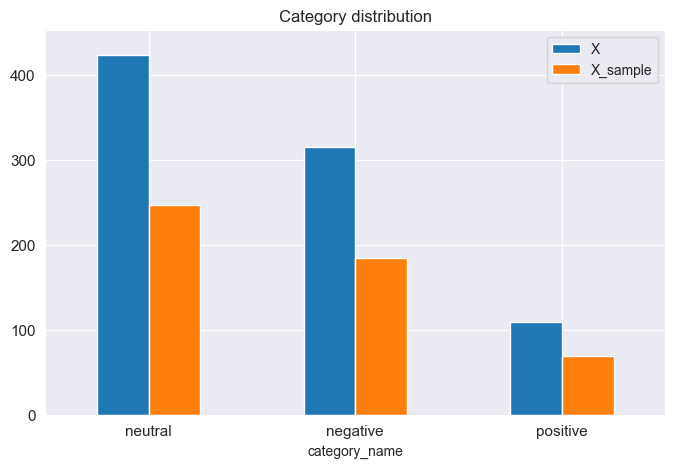

In [61]:
# ==========================================
# Exercise 8
# ==========================================
# Feature Creation
import nltk
nltk.download('punkt', quiet=True)
from sklearn.feature_extraction.text import CountVectorizer
def tokenize_text(text):
    return nltk.word_tokenize(str(text))
X['unigrams'] = X['text'].apply(tokenize_text)
# Display sample unigrams
print("Sample unigrams from first 3 posts:")
for i in range(3):
    print(f"Post {i+1} (first 10 tokens): {X['unigrams'].iloc[i][:10]}")

# Side-by-side comparison of distributions
df = pd.DataFrame({
    "X": X['category_name'].value_counts(),
    "X_sample": X_sample['category_name'].value_counts()
}).fillna(0).astype(int)

ax = df.plot(kind="bar",
             title="Category distribution",
             rot=0, fontsize=11, figsize=(8,5))

ax.set_ylim(0, df.to_numpy().max() + 30)

In [62]:
# ==========================================
# Exercise 9
# ==========================================
# Feature Subset Selection
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['text'])
print(f"\nDocument-term matrix shape: {X_counts.shape}")
print(f"Vocabulary size: {X_counts.shape[1]}")

# Get feature names
feature_names = count_vect.get_feature_names_out()
print(f"First 10 features: {feature_names[:10]}")

# Analyze the first record
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
count_vect.fit(X['text'])
analyze = count_vect.build_analyzer()
# Analyze first Reddit post
analyze(X['text'][0])



Document-term matrix shape: (847, 4508)
Vocabulary size: 4508
First 10 features: ['00' '000' '01378' '02' '027' '03' '04' '06' '08' '10']


['retardation',
 'is',
 'on',
 'the',
 'menu',
 'boys',
 'wsb',
 'is',
 'so',
 'back',
 'calls',
 'on',
 'retards']

In [77]:
# ==========================================
# Exercise 10
# ==========================================
X_counts.shape
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [79]:
# Find which words correspond to non-zero values in the matrix
vocab = count_vect.get_feature_names_out()

# Row 2 has a 1 at position 9
print(f"Word at position 9: {vocab[9]}")

# Row 4 has a 3 at position 19
print(f"Word at position 19: {vocab[19]} (appears 3 times)")

# Check what these words are in the actual text
print(f"\nRow 2 text: {X['text'][1][:100]}...")
print(f"Row 4 text: {X['text'][3][:100]}...")

Word at position 9: 10
Word at position 19: 116 (appears 3 times)

Row 2 text: Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history ...
Row 4 text: Who knows more? $VMAR Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their co...


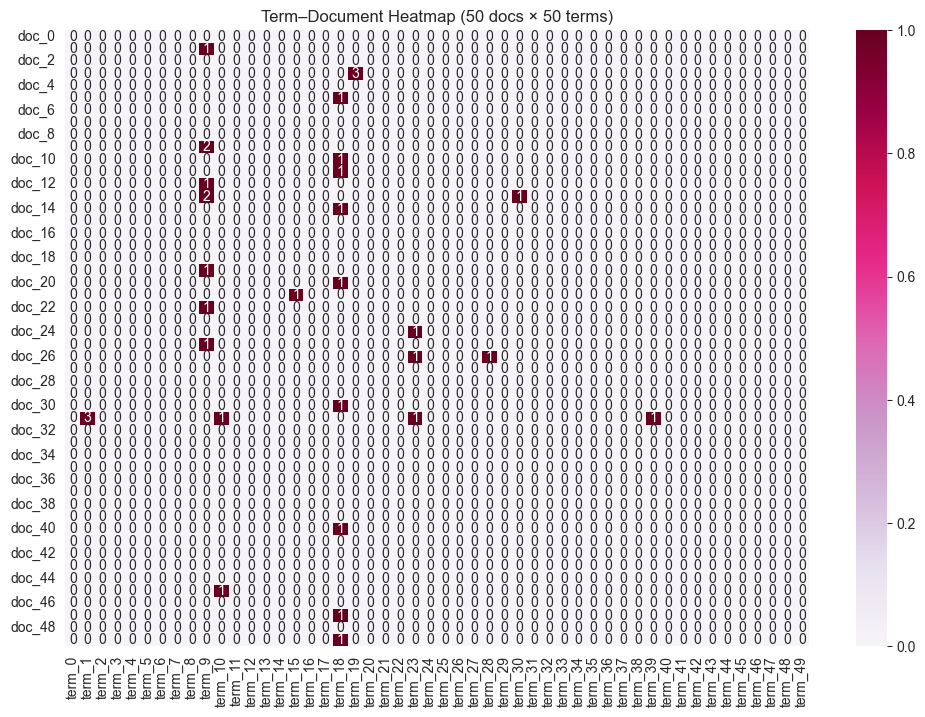

In [83]:
# ==========================================
# Exercise 11
# ==========================================
# Create heatmap of term-document matrix
import matplotlib.pyplot as plt
import seaborn as sns

n_docs  = 50     # rows
n_terms = 50      # columns
plot_z = X_counts[0:n_docs, 0:n_terms].toarray()
plot_x = [f"term_{i}" for i in range(n_terms)]
plot_y = [f"doc_{i}"  for i in range(n_docs)]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(12, 8))
sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.title(f"Term–Document Heatmap ({n_docs} docs × {n_terms} terms)")
plt.show()

In [86]:
# ==========================================
# Exercise 12
# ==========================================
# Interactive visualization
import plotly.express as px
# Calculate term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# Get the vocabulary
vocab = count_vect.get_feature_names_out()
# Select top 50 most frequent terms
top_indices = term_frequencies.argsort()[-50:][::-1]
top_terms = [vocab[i] for i in top_indices]
top_frequencies = [term_frequencies[i] for i in top_indices]
# Create interactive bar chart with Plotly
fig = px.bar(x=top_terms, y=top_frequencies,
             title="Top 50 Most Frequent Terms in Reddit Stock Comments",
             labels={'x': 'Terms', 'y': 'Frequency'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Total vocabulary size: 4508 terms


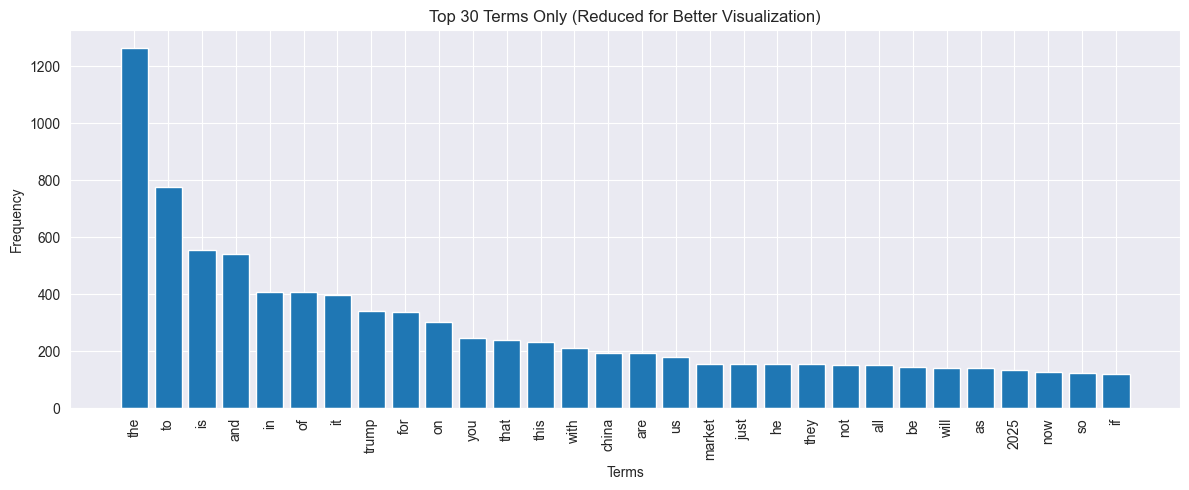

Reduced from 4508 to 30 terms for cleaner visualization


In [89]:
# ==========================================
# Exercise 13
# ==========================================
# Calculate term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
vocab = count_vect.get_feature_names_out()
print(f"Total vocabulary size: {len(vocab)} terms")
# Take top 30 most frequent words
top_30_indices = term_frequencies.argsort()[-30:][::-1]
top_30_terms = [vocab[i] for i in top_30_indices]
top_30_freqs = [term_frequencies[i] for i in top_30_indices]

# Visualize only these 30 terms
plt.figure(figsize=(12, 5))
plt.bar(range(30), top_30_freqs)
plt.xticks(range(30), top_30_terms, rotation=90)
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.title('Top 30 Terms Only (Reduced for Better Visualization)')
plt.tight_layout()
plt.show()

print(f"Reduced from {len(vocab)} to 30 terms for cleaner visualization")

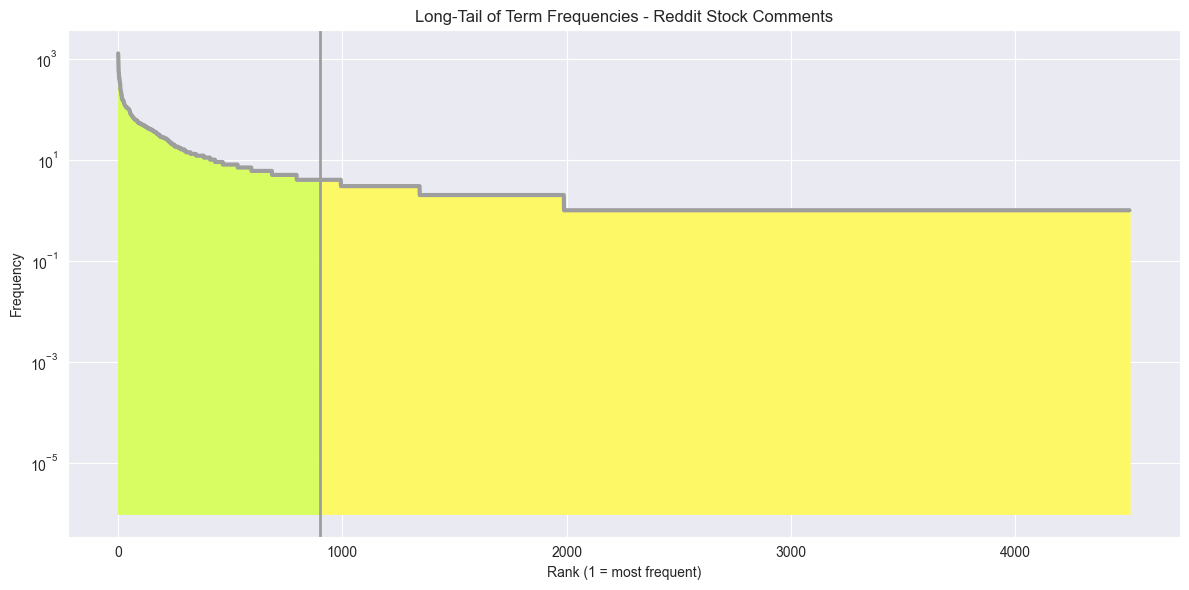

In [94]:
# ==========================================
# Exercise 14
# ==========================================
# # Create the long-tail visualization
import numpy as np
import matplotlib.pyplot as plt
# Calculate term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# Sort by frequency (descending)
idx = np.argsort(term_frequencies)[::-1]
sorted_freqs = term_frequencies[idx].astype(float)
x = np.arange(1, len(sorted_freqs) + 1)
# Define head as top 20% of terms
head_cut = max(1, int(0.2 * len(sorted_freqs)))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, sorted_freqs, linewidth=3, color="#9e9e9e")  # curve
plt.fill_between(x[:head_cut], sorted_freqs[:head_cut], 1e-6, color="#D6FF5B", alpha=0.95)  # head (top 20%)
plt.fill_between(x[head_cut-1:], sorted_freqs[head_cut-1:], 1e-6, color="#FFF95E", alpha=0.95)
plt.axvline(head_cut, linewidth=2, color="#9e9e9e")
plt.yscale("log")
plt.xlabel("Rank (1 = most frequent)")
plt.ylabel("Frequency")
plt.title("Long-Tail of Term Frequencies - Reddit Stock Comments")
plt.tight_layout()
plt.show()

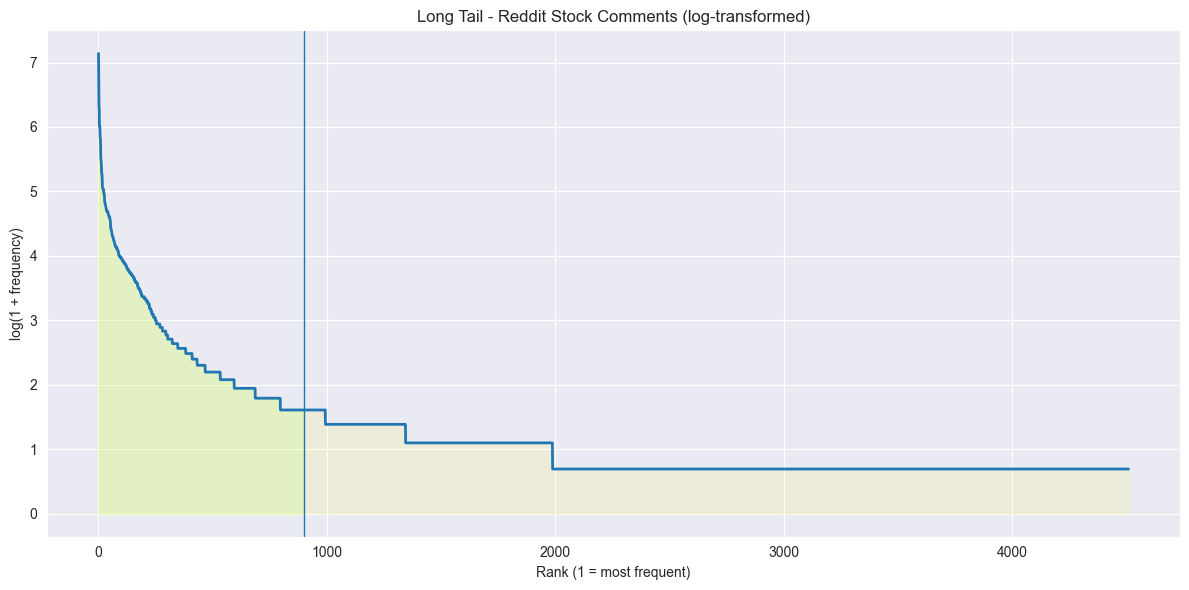

In [97]:
# ==========================================
# Exercise 15
# ==========================================
# Log distribution
# Calculate term frequencies (if not already done)
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Convert to float and sort
freqs = np.asarray(term_frequencies, dtype=float)
rank_idx = np.argsort(freqs)[::-1]
rank = np.arange(1, len(freqs) + 1)
y_log = np.log1p(freqs[rank_idx])  # log transform AFTER ranking

# Define head as top 20% of terms
head_cut = max(1, int(0.2 * len(y_log)))

# Create visualization
plt.figure(figsize=(12, 6))
plt.plot(rank, y_log, linewidth=2)
plt.fill_between(rank[:head_cut], y_log[:head_cut], color="#D6FF5B", alpha=0.3)  # head
plt.fill_between(rank[head_cut-1:], y_log[head_cut-1:], color="#FFF95E", alpha=0.15)  # tail
plt.axvline(head_cut, linewidth=1)
plt.xlabel("Rank (1 = most frequent)")
plt.ylabel("log(1 + frequency)")
plt.title("Long Tail - Reddit Stock Comments (log-transformed)")
plt.tight_layout()
plt.show()

# The log transformation makes the curve flatter:
# Head compresses (high frequencies are less extreme)
# Tail lifts (low frequencies are more visible)
# Easier to see mid-frequency terms
# log1p avoids issues with zero frequencies

# Phase 2

In [ ]:
### Begin Assignment Here